# Basic Python for Data Analytics

A quickstart Python workshop...


```
DATE,FLUR
1976-01-01,9.7
1976-02-01,9.7
1976-03-01,9.6
1976-04-01,9.5
1976-05-01,9.3
1976-06-01,9.2
1976-07-01,9.1
1976-08-01,9.1
1976-09-01,9.1
1976-10-01,9.1
1976-11-01,9.1
1976-12-01,9.1
1977-01-01,9.0
```

...And here is the code...

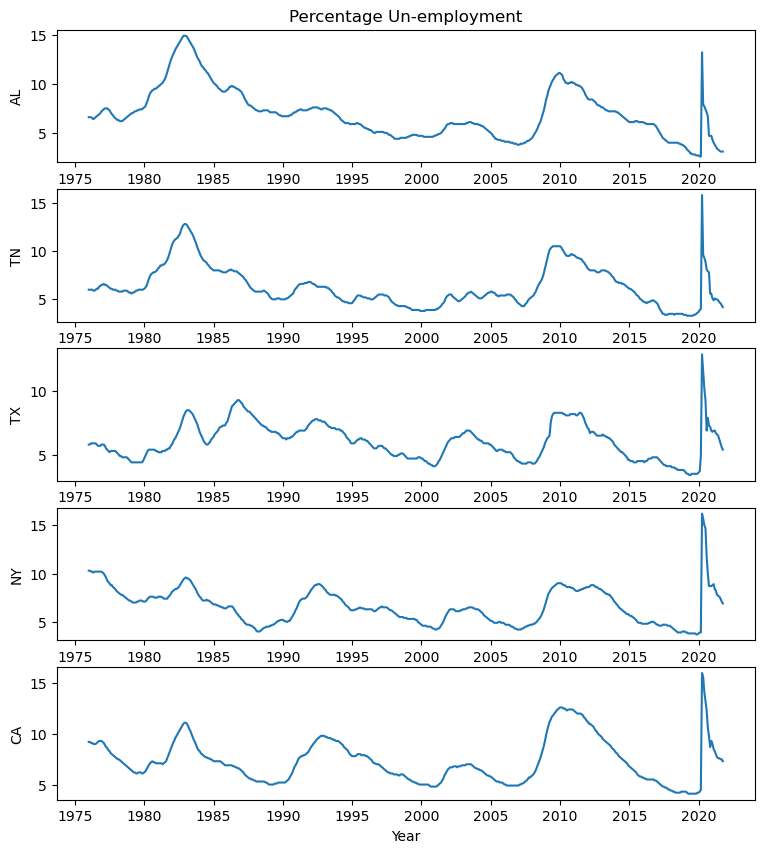

In [ ]:
# various imports of libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ask matplotlib to plot in notebooks
%matplotlib inline

# setting up plot sizes
width_inches = 9
subplot_height_inches = 2

# where is our data?
baseurl = "https://raw.githubusercontent.com/univai-ghf/ghfmedia/main/"

# defining a function to load and clean unemployment data
def get_unemployment_data(state_abbrev):
    # fetch and read csv file into a dataframe
    data = pd.read_csv(baseurl+"data/"+state_abbrev+"UR.csv")
    # convert date to a python datetime object
    data['DATE'] = pd.to_datetime(data['DATE'])
    return data

# creating a dictionary the hold the data, with
# the lookup keys being the state abbreviations
states = ['AL', 'TN', 'TX', 'NY', 'CA']
state_data=dict()
for abbrev in states:
    state_data[abbrev] = get_unemployment_data(abbrev)
    
# plotting the data    

# create as many subplots as we have states
fig, ax = plt.subplots(nrows=len(states), 
                       figsize = (width_inches, subplot_height_inches*len(states)))

counter = 0
for state_abbrev in states:
    # get daraframe from dictionary
    data = state_data[state_abbrev]
    # plot the data
    ax[counter].plot(data['DATE'], data[state_abbrev+'UR'])
    # label which state it is
    ax[counter].set_ylabel(state_abbrev)
    counter = counter + 1
# Year label only below last subplot
ax[4].set_xlabel("Year")

# title only on first subplot
ax[0].set_title("Percentage Un-employment");

At this point in the course the following code should broadly make sense to you. We import the libraries we need, set up some variables, and define a function

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
width_inches = 9
subplot_height_inches = 2
baseurl = "https://raw.githubusercontent.com/univai-ghf/ghfmedia/main/"

In [ ]:
def get_unemployment_data(state_abbrev):
    data = pd.read_csv(baseurl+"data/"+state_abbrev+"UR.csv")
    data['DATE'] = pd.to_datetime(data['DATE'])
    return data

What is going on inside the function? It loads some data from a csv, does something with a date and returns some data...let us break it down.

Let us focus on the string inside the `pd.read_csv` call and what is inside it first:

`state_abbrev` is provided as an argument to `get_unemployment_data` and we use it in the string. Lets simulate this outside of the function to understand:

In [ ]:
state_abbrev = 'CA'
baseurl+"data/"+state_abbrev+"UR.csv"

'https://raw.githubusercontent.com/univai-ghf/ghfmedia/main/data/CAUR.csv'

So, the addition operator on strings simply concatenates them together. 

### Constructors, Methods and Instance variables

Ok, now to read in the data. The `pd.read_csv` function is a **constructor function** that creates a Pandas **dataframe object** from a CSV file. The file can be at a remote url. A dataframe object is like a spreadsheet in memory:

In [ ]:
data = pd.read_csv(baseurl+"data/"+state_abbrev+"UR.csv")
type(data)

pandas.core.frame.DataFrame

Now, various functions can be carried out on this dataframe. Functions that belong to objects are called **methods**. The `.head` method on dataframes shows us the first 5 rows of this spreadsheet, the column names, and row ids.

In [ ]:
data.head()

,DATE,CAUR
0,1976-01-01,9.2
1,1976-02-01,9.2
2,1976-03-01,9.1
3,1976-04-01,9.1
4,1976-05-01,9.0


Objects can have **properties**, or **attributes**, also called **instance variables**, because they belong to an instance of the object. For example, if I want to know all the column types in a given dataframe object, I can use the `.dtypes` instance variable

In [ ]:
data.dtypes

DATE     object
CAUR    float64
dtype: object

What is in the column? This is an interesting syntax, to be read as "the `DATE` in the `data`":

In [ ]:
data['DATE']

0      1976-01-01
1      1976-02-01
2      1976-03-01
3      1976-04-01
4      1976-05-01
          ...    
545    2021-06-01
546    2021-07-01
547    2021-08-01
548    2021-09-01
549    2021-10-01
Name: DATE, Length: 550, dtype: object

In [ ]:
type(data['DATE'])

pandas.core.series.Series

Its a Pandas Series: a series of dates to be precise, of length 550.

Notice that the `DATE` column has the generic `object` type. 

In [ ]:
data.dtypes

DATE     object
CAUR    float64
dtype: object

We really want a date. It turns out that a function defined in the pandas library can do this conversion for us:

In [ ]:
data['DATE'] = pd.to_datetime(data['DATE'])
data.dtypes

DATE    datetime64[ns]
CAUR           float64
dtype: object

Note that I re-assigned the output of `pd.to_datetime` to `data['DATE']`. In other words I labeled a new piece of memory with the old post-it. What happened to the original piece of memory with the old series? Its been abandoned, and python will free its memory...this is called **garbage collection**.

Reading in the data into a dataframe and then making a change to the `DATE` column is exactly what the function `get_unemployment_data` does:

```python
def get_unemployment_data(state_abbrev):
    data = pd.read_csv(baseurl+"data/"+state_abbrev+"UR.csv")
    data['DATE'] = pd.to_datetime(df['DATE'])
    return data
```

## EXTRA CREDIT CODING QUSTION

Here is a list of x-values, the deviations from the mean temperature of a mechanical device. The corresponding y-values are failures. Plotted, they look like this:

![](images/failures.png)

In [ ]:
xvals = [-2.022945287808054, -1.8486091760122103, -1.8476481826866842, -1.7435854332654428, 
         -1.5282423673888716, -1.3945778557109074, -1.1403979924220742, -0.8009077275459544,
         -0.7108560219444477, -0.5638678812593274, -0.43048994749879754, -0.4265240230310121,
         -0.23456806947264375, -0.08933017942095312, 0.04091978204507629, 0.5542534388866378,
         0.5558786314354511, 0.8006640938973202, 1.2144534202678483, 1.9118026057089639]
y = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]

Future you has run a logistic regression model and come up with the following parameters called slope and intercept:

In [ ]:
slope, intercept = (9.812037170985635, 5.175316482607568) 

This syntax is called the destructuring of another kind of list, called a tuple.

1. Implement an anonymous or other function to calculate the probability of failure $p(x)$:

$$p(x) = \frac{1}{1+e^{-(b + m x)}}$$

where $m$ is the slope and $b$ is the intercept. Use the function you defined to create an array `probs` of the probability of failures at the 20 temperatures above

In [ ]:
# your code here
import math
proba = lambda x: 1./(1 + math.exp(-(intercept + slope*x)))
#....
probs

[4.2384487899544125e-07,
 2.3448061801774165e-06,
 2.367020582552928e-06,
 6.571192923791013e-06,
 5.4358541876421125e-05,
 0.00020173914933983947,
 0.002437575065306435,
 0.06397080195941987,
 0.14189620473359968,
 0.41159487946671264,
 0.7213831993772614,
 0.7291366897897232,
 0.9465322242527417,
 0.9865972956193445,
 0.9962296985932257,
 0.9999754229236333,
 0.9999758117230415,
 0.9999978096835431,
 0.9999999622235002,
 0.9999999999596727]

2. Use these probabilities to make classifications at each of these 20 x-values in a new list `classi`. A data point is classified as a failure if the probability of failure $p(x)$ is greater than or equal to the probability of not failing (which is $1 - p(x)$. Compare these to the $y$ values in the data set to report the fraction of correctly classified failures (an element in `classi` is equal to the corresponding element in $y$) from the model. (you will need to create a counter which you increment to track the total number of correctly classified data points.

In [ ]:
# your code here
#.....
accuracy

0.9

This brings us to another listy construct, one that is critical in datascience...

### Numpy's `ndarray`s

Pandas Series objects are actually are thin veneers around a different list type in Python, called the `ndarray`. Unlike regular Python lists, `ndarray`s cannot have heterogeneous elements: all elements must have the same type. This means that python can optimize how these arrays are stored and accessed, which leads to faster access.

Look:

In [ ]:
caurvalues = data['CAUR'].values
caurvalues

array([ 9.2,  9.2,  9.1,  9.1,  9. ,  9. ,  9. ,  9.1,  9.2,  9.3,  9.3,
        9.3,  9.2,  9.1,  8.9,  8.7,  8.6,  8.4,  8.3,  8.1,  8. ,  7.9,
        7.8,  7.7,  7.6,  7.5,  7.5,  7.4,  7.3,  7.2,  7.1,  7. ,  6.9,
        6.8,  6.7,  6.6,  6.5,  6.4,  6.3,  6.2,  6.2,  6.1,  6.1,  6.2,
        6.2,  6.2,  6.1,  6.1,  6.2,  6.3,  6.5,  6.7,  6.9,  7.1,  7.2,
        7.3,  7.2,  7.2,  7.1,  7.1,  7.1,  7.1,  7.1,  7.1,  7. ,  7.1,
        7.2,  7.3,  7.6,  7.9,  8.2,  8.5,  8.8,  9.1,  9.3,  9.6,  9.8,
       10. , 10.2, 10.4, 10.6, 10.8, 11. , 11.1, 11.1, 11. , 10.8, 10.5,
       10.3, 10. ,  9.7,  9.4,  9.2,  8.9,  8.6,  8.4,  8.3,  8.1,  8. ,
        7.9,  7.8,  7.7,  7.7,  7.6,  7.6,  7.5,  7.5,  7.4,  7.3,  7.3,
        7.3,  7.3,  7.3,  7.3,  7.3,  7.2,  7.1,  7. ,  6.9,  6.9,  6.9,
        6.9,  6.9,  6.9,  6.9,  6.8,  6.8,  6.7,  6.7,  6.6,  6.6,  6.5,
        6.4,  6.3,  6.2,  6. ,  5.9,  5.8,  5.7,  5.6,  5.6,  5.5,  5.5,
        5.4,  5.4,  5.3,  5.3,  5.3,  5.3,  5.3,  5

In [ ]:
type(caurvalues)

numpy.ndarray

In [ ]:
caurvalues.dtype

dtype('float64')

Here all these floating point numbers are stored next to each other in memory.

While you can iterate over `ndarray`s, you are advised not to. This is because the `numpy` library optimizes operations over entire arrays, the so called **vectorized** operations, to be very fast. It also re-purposes standard python syntax for this..

Dont do this:

In [ ]:
squares = []
for element in caurvalues:
    squares.append(element*element)

But rather do this:

In [ ]:
squares = caurvalues*caurvalues 

In this calculation the `*` operations work pairwise: each element of the `caurvalues` array is multiplied by itself to create the new array. Because there is no iteration and Python handles the multiplication internally, this is a fast operation. This is called a **vector operation**. Another one:

In [ ]:
caurvalues + caurvalues

array([18.4, 18.4, 18.2, 18.2, 18. , 18. , 18. , 18.2, 18.4, 18.6, 18.6,
       18.6, 18.4, 18.2, 17.8, 17.4, 17.2, 16.8, 16.6, 16.2, 16. , 15.8,
       15.6, 15.4, 15.2, 15. , 15. , 14.8, 14.6, 14.4, 14.2, 14. , 13.8,
       13.6, 13.4, 13.2, 13. , 12.8, 12.6, 12.4, 12.4, 12.2, 12.2, 12.4,
       12.4, 12.4, 12.2, 12.2, 12.4, 12.6, 13. , 13.4, 13.8, 14.2, 14.4,
       14.6, 14.4, 14.4, 14.2, 14.2, 14.2, 14.2, 14.2, 14.2, 14. , 14.2,
       14.4, 14.6, 15.2, 15.8, 16.4, 17. , 17.6, 18.2, 18.6, 19.2, 19.6,
       20. , 20.4, 20.8, 21.2, 21.6, 22. , 22.2, 22.2, 22. , 21.6, 21. ,
       20.6, 20. , 19.4, 18.8, 18.4, 17.8, 17.2, 16.8, 16.6, 16.2, 16. ,
       15.8, 15.6, 15.4, 15.4, 15.2, 15.2, 15. , 15. , 14.8, 14.6, 14.6,
       14.6, 14.6, 14.6, 14.6, 14.6, 14.4, 14.2, 14. , 13.8, 13.8, 13.8,
       13.8, 13.8, 13.8, 13.8, 13.6, 13.6, 13.4, 13.4, 13.2, 13.2, 13. ,
       12.8, 12.6, 12.4, 12. , 11.8, 11.6, 11.4, 11.2, 11.2, 11. , 11. ,
       10.8, 10.8, 10.6, 10.6, 10.6, 10.6, 10.6, 10

**Broadcasting** allows us to all kinds of nice things with numpy arrays:

In [ ]:
caurvalues + 5

array([14.2, 14.2, 14.1, 14.1, 14. , 14. , 14. , 14.1, 14.2, 14.3, 14.3,
       14.3, 14.2, 14.1, 13.9, 13.7, 13.6, 13.4, 13.3, 13.1, 13. , 12.9,
       12.8, 12.7, 12.6, 12.5, 12.5, 12.4, 12.3, 12.2, 12.1, 12. , 11.9,
       11.8, 11.7, 11.6, 11.5, 11.4, 11.3, 11.2, 11.2, 11.1, 11.1, 11.2,
       11.2, 11.2, 11.1, 11.1, 11.2, 11.3, 11.5, 11.7, 11.9, 12.1, 12.2,
       12.3, 12.2, 12.2, 12.1, 12.1, 12.1, 12.1, 12.1, 12.1, 12. , 12.1,
       12.2, 12.3, 12.6, 12.9, 13.2, 13.5, 13.8, 14.1, 14.3, 14.6, 14.8,
       15. , 15.2, 15.4, 15.6, 15.8, 16. , 16.1, 16.1, 16. , 15.8, 15.5,
       15.3, 15. , 14.7, 14.4, 14.2, 13.9, 13.6, 13.4, 13.3, 13.1, 13. ,
       12.9, 12.8, 12.7, 12.7, 12.6, 12.6, 12.5, 12.5, 12.4, 12.3, 12.3,
       12.3, 12.3, 12.3, 12.3, 12.3, 12.2, 12.1, 12. , 11.9, 11.9, 11.9,
       11.9, 11.9, 11.9, 11.9, 11.8, 11.8, 11.7, 11.7, 11.6, 11.6, 11.5,
       11.4, 11.3, 11.2, 11. , 10.9, 10.8, 10.7, 10.6, 10.6, 10.5, 10.5,
       10.4, 10.4, 10.3, 10.3, 10.3, 10.3, 10.3, 10

Remember how we said that instead of explicit iteration, you should use built-in numpy functions? For example, the `numpy` library also gives us access to some simple statistics for these unemployment rates:

In [ ]:
np.mean(caurvalues)

7.3090909090909095

In [ ]:
np.median(caurvalues)

6.9

In [ ]:
np.std(caurvalues)

2.1758904323411414

There are many other ways of creating numpy arrays. You will learn these in time.

In [ ]:
my_array = np.array([1, 2, 3, 4])
my_array

array([1, 2, 3, 4])

### Back to our example

We now create an empty dictionary `state_data` to hold all our data. Then we iterate over our states, reading the CSV file for each state and putting the resultant Pandas Dataframes as the value corresponding to the state abbreviation key in the dictionary

In [ ]:
states = ['AL', 'TN', 'TX', 'NY', 'CA']
state_data=dict()
for abbrev in states:
    state_data[abbrev] = get_unemployment_data(abbrev)

In [ ]:
state_data

{'AL':           DATE  ALUR
 0   1976-01-01   6.6
 1   1976-02-01   6.6
 2   1976-03-01   6.6
 3   1976-04-01   6.5
 4   1976-05-01   6.4
 ..         ...   ...
 545 2021-06-01   3.3
 546 2021-07-01   3.2
 547 2021-08-01   3.1
 548 2021-09-01   3.1
 549 2021-10-01   3.1
 
 [550 rows x 2 columns],
 'TN':           DATE  TNUR
 0   1976-01-01   6.0
 1   1976-02-01   6.0
 2   1976-03-01   6.0
 3   1976-04-01   6.0
 4   1976-05-01   5.9
 ..         ...   ...
 545 2021-06-01   4.9
 546 2021-07-01   4.7
 547 2021-08-01   4.6
 548 2021-09-01   4.4
 549 2021-10-01   4.2
 
 [550 rows x 2 columns],
 'TX':           DATE  TXUR
 0   1976-01-01   5.8
 1   1976-02-01   5.8
 2   1976-03-01   5.9
 3   1976-04-01   5.9
 4   1976-05-01   5.9
 ..         ...   ...
 545 2021-06-01   6.5
 546 2021-07-01   6.2
 547 2021-08-01   5.9
 548 2021-09-01   5.6
 549 2021-10-01   5.4
 
 [550 rows x 2 columns],
 'NY':           DATE  NYUR
 0   1976-01-01  10.3
 1   1976-02-01  10.3
 2   1976-03-01  10.2
 3   1976-04-01

## Plotting using the library `matplotlib`

The standard plotting library in python is `matplotlib`, which is a very powerful plotting library. Let us see how to plot the time series of unemployment numbers from California.

We first import the library and instruct it to plot "inline" in the Jupyter notebook.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

We first create a figure, and axes associated with this figure using the figure constructor. The relationship of the axes to the figure can be seen in this diagram from Brandon Rohrer's excellent free matplotlib course at https://end-to-end-machine-learning.teachable.com/p/navigating-matplotlib-tutorial-how-to/ .

For us though, the main thing to know is that figures hold axes, and axes hold lines. This plot from the above course illustrates this well:

![](https://github.com/univai-ghf/ghfmedia/raw/main/images/figax.png)

The `subplots` constructor, in the `matplotlib.pyplot` module, returns us BOTH these objects:

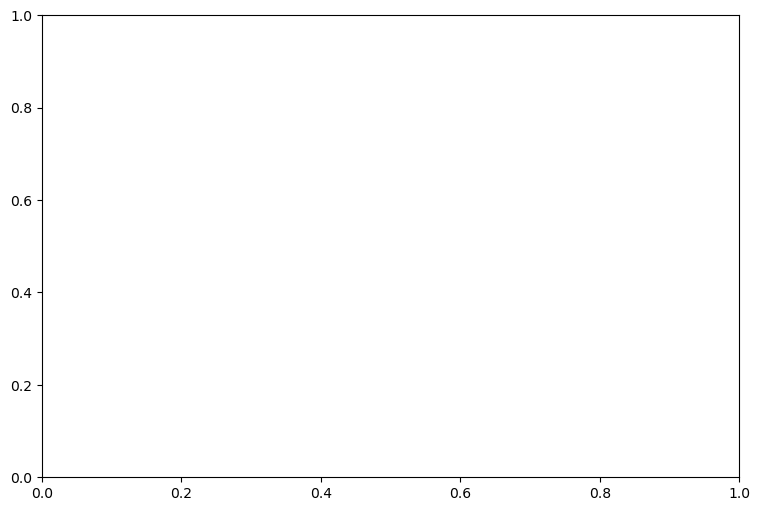

In [ ]:
fig, ax = plt.subplots(figsize = (9,6))

In [ ]:
type(fig)

matplotlib.figure.Figure

In [ ]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

The axes object has a method `plot` defined on it. 

It takes as its first argument something listy for the x-axis..a list, or a numpy `ndarray`, or a Pandas Series. 

The second argument represents the y-data, also something listy. So, for example:

[<matplotlib.lines.Line2D>]

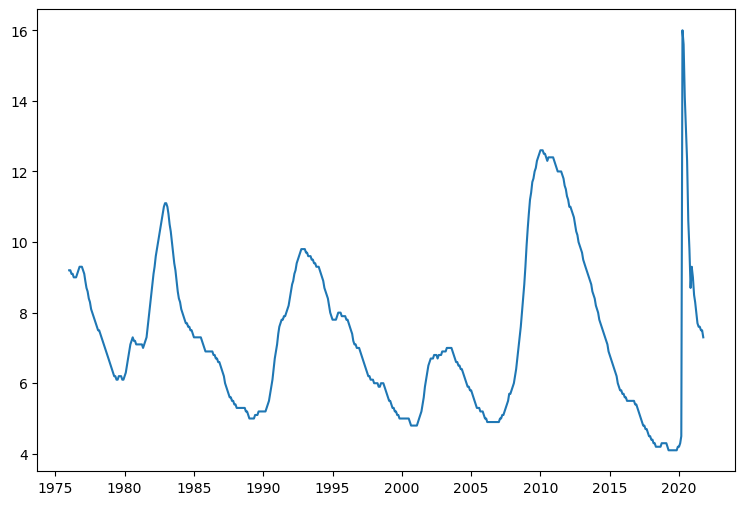

In [ ]:
fig, ax = plt.subplots(figsize = (9,6))
ax.plot(data['DATE'], data['CAUR'])

We'll use some other methods on the axes object to create a nicely labeled plot:

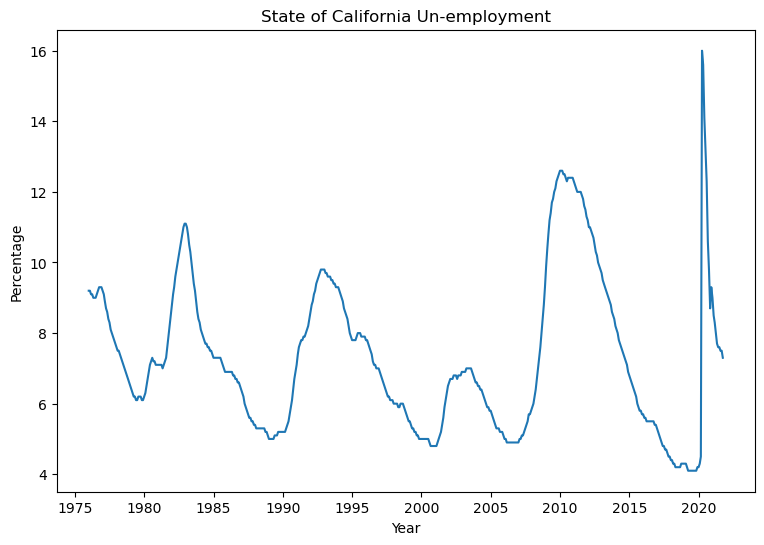

In [ ]:
fig, ax = plt.subplots(figsize = (9,6))
ax.plot(data['DATE'], data['CAUR'])
ax.set_xlabel("Year")
ax.set_ylabel("Percentage")
ax.set_title("State of California Un-employment");

## Histogram

Here is a dictionary with the percentage of double vaccinated (against Covid-19) people in the population in 50 US States.

In [ ]:
vaxdict = {'Alaska': 52.3,
 'Alabama': 45.6,
 'Arkansas': 48.9,
 'Arizona': 54.2,
 'California': 63.3,
 'Colorado': 63.3,
 'Connecticut': 71.0,
 'Delaware': 60.7,
 'Florida': 59.1,
 'Georgia': 49.2,
 'Hawaii': 60.8,
 'Iowa': 55.8,
 'Idaho': 43.2,
 'Illinois': 61.5,
 'Indiana': 49.4,
 'Kansas': 54.5,
 'Kentucky': 51.2,
 'Louisiana': 47.9,
 'Massachusetts': 71.8,
 'Maryland': 67.8,
 'Maine': 69.9,
 'Michigan': 54.5,
 'Minnesota': 62.9,
 'Missouri': 50.6,
 'Mississippi': 46.7,
 'Montana': 50.6,
 'North Carolina': 53.5,
 'North Dakota': 49.6,
 'Nebraska': 57.5,
 'New Hampshire': 62.5,
 'New Jersey': 67.2,
 'New Mexico': 63.3,
 'Nevada': 52.7,
 'New York': 67.9,
 'Ohio': 52.7,
 'Oklahoma': 51.2,
 'Oregon': 62.9,
 'Pennsylvania': 59.3,
 'Rhode Island': 74.1,
 'South Carolina': 50.6,
 'South Dakota': 54.3,
 'Tennessee': 49.3,
 'Texas': 54.1,
 'Utah': 55.6,
 'Virginia': 65.2,
 'Vermont': 74.0,
 'Washington': 64.2,
 'Wisconsin': 59.3,
 'West Virginia': 52.8,
 'Wyoming': 44.4}

Let's plot a histogram of percentage of double vaccinated (against Covid-19) people in the US states. Label the x and y axis and set a title

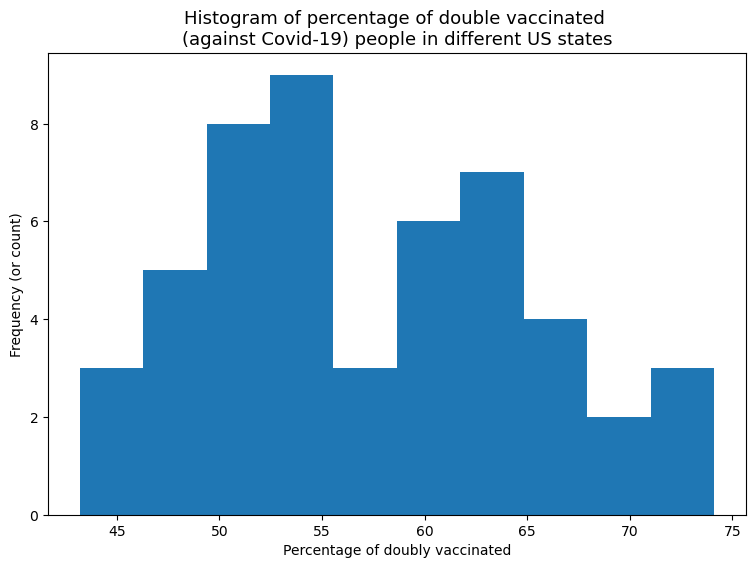

In [ ]:
# use a list comprehension to get all the values from the vaxdict


fig, ax = plt.subplots(figsize = (9,6))
ax.hist([vaxdict[state] for state in vaxdict])
ax.set_xlabel('Percentage of doubly vaccinated')
ax.set_ylabel('Frequency (or count)')
ax.set_title('Histogram of percentage of double vaccinated \n(against Covid-19) people in different US states', fontsize=13);

## Putting it all together

We are now in the position of keeping our promise of being able to make a comparative plot of employment rates.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
width_inches = 9
subplot_height_inches = 2
baseurl = "https://raw.githubusercontent.com/univai-ghf/ghfmedia/main/"

In [ ]:
def get_unemployment_data(state_abbrev):
    data = pd.read_csv(baseurl+"data/"+state_abbrev+"UR.csv")
    data['DATE'] = pd.to_datetime(data['DATE'])
    return data

We now provide the `subplots` constructor function with an additional argument, the number of rows. We want to make a figure with multiple rows, each row corresponding to a state. The figure size needs to change too, as the height must keep up with the number of states in the `states` list. Then, the enumeration gives us the index for each state, and uses that index to match the axes for the subplot. We use that axes to plot the corresponding data, labeling the y-axis for each subplot with the state abbreviation. Finally we set an x-label on the last axes, and a title on the first one!

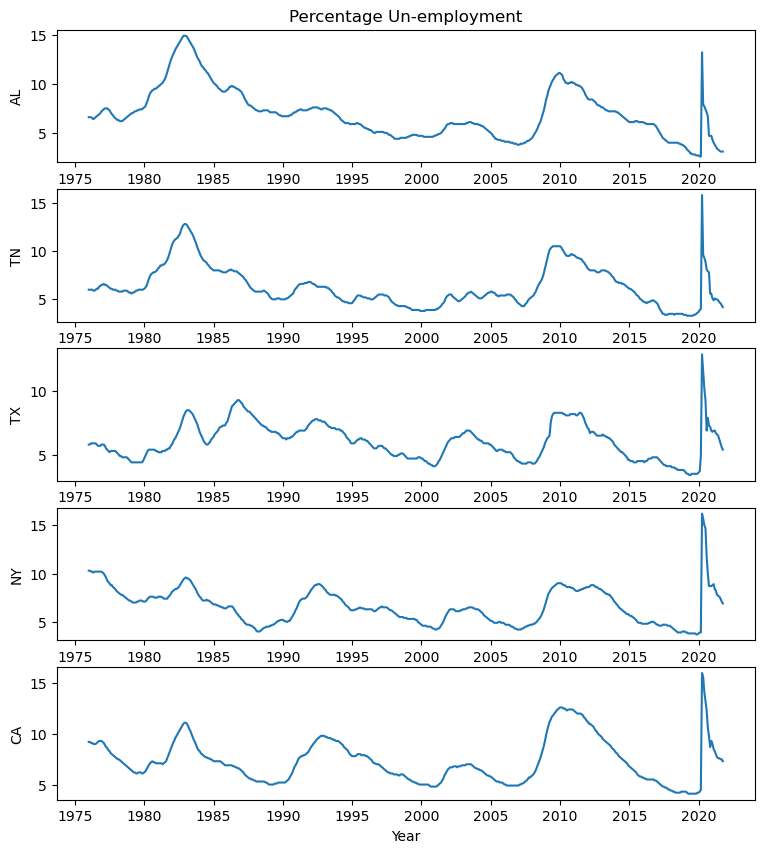

In [ ]:
fig, ax = plt.subplots(nrows=len(states), 
    figsize = (width_inches, subplot_height_inches*len(states)))
counter = 0
for state_abbrev in states:
    data = state_data[state_abbrev]
    ax[counter].plot(data['DATE'], data[state_abbrev+'UR'])
    ax[counter].set_ylabel(state_abbrev)
    counter = counter + 1
ax[-1].set_xlabel("Year")
ax[0].set_title("Percentage Un-employment");